In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Superstore.xls']


In [2]:
import warnings
import itertools
import numpy as np 
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd 
import statsmodels.api as sm 
import matplotlib 

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel('../input/Superstore.xls')

In [4]:
# Forecaset furniture sales
furniture = df.loc[df['Category'] == 'Furniture']

In [5]:
# Check category timestamp 
furniture['Order Date'].min(), furniture['Order Date'].max()

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Pre-proc 1
    # remove cols
    # aggregate sales by date 
    # check completeness 
    
    
# Grab cols 
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 
        'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 
       'Profit']


# Drop 
furniture.drop(cols, axis = 1, inplace = True) 

# Sort
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [7]:
# Aggregate
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [8]:
# Index with time series data 

furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [9]:
# Use start of each month as timestamp 
# Use avg daily sales / month

# Set preferred calender frequency to Month Start in resample
    # https://stackoverflow.com/questions/17001389/pandas-resample-documentation
    
y = furniture['Sales'].resample('MS').mean()

y['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

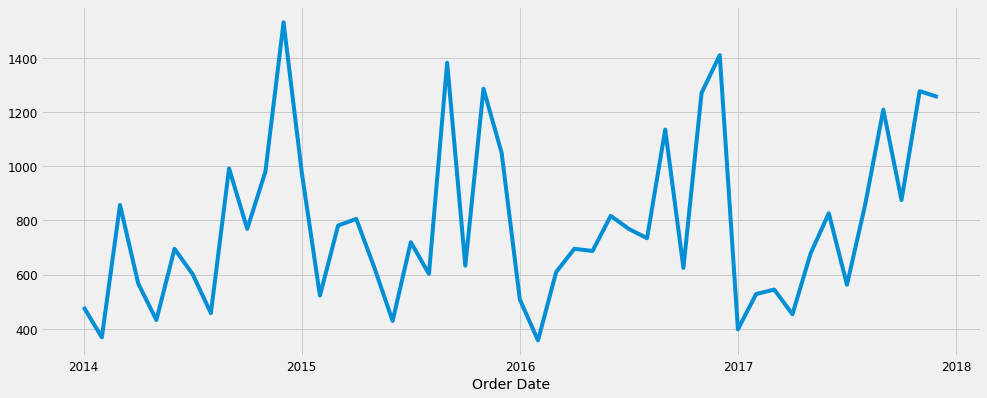

In [10]:
# Plot y

y.plot(figsize = (15, 6))

plt.show()

In [11]:
# Sales low at start, high at end of years 

# Seasonality pattern

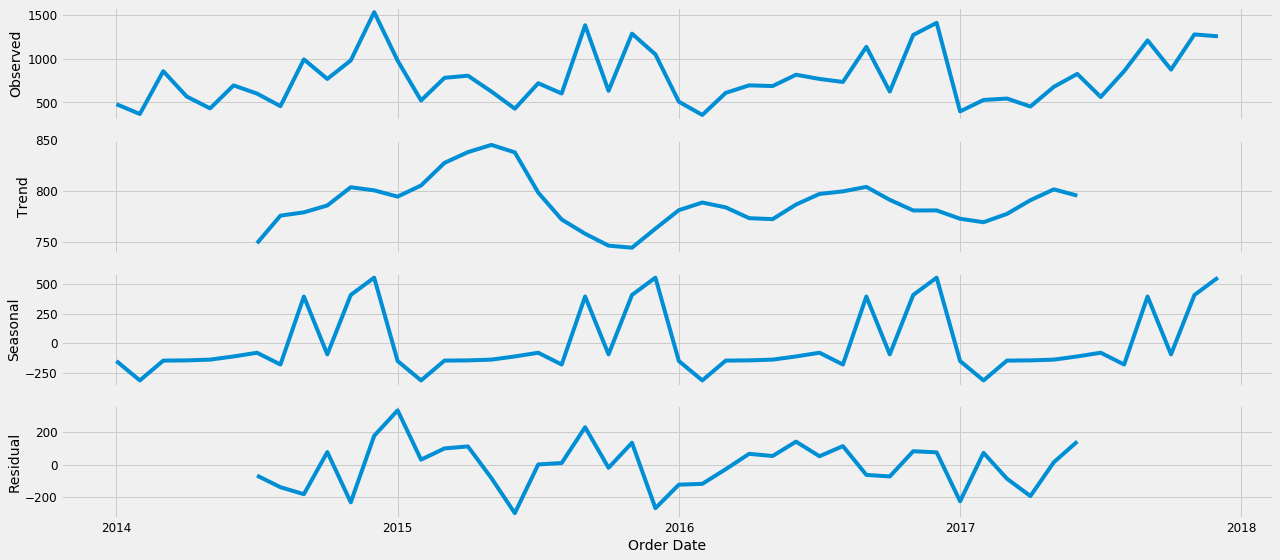

In [12]:
# Time series decomposition 
    # trend / seasonality / noise 
    
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 8 

decomp = sm.tsa.seasonal_decompose(y, model = 'additive')

fig = decomp.plot()

plt.show()

In [13]:
# Sales is unstable with no stable pattern apart from seasonality 

In [14]:
# ARIMA forecasting 
    # Autoregressive Integrated Move Average 
    
# Param selection for ARIMA time series model 
    # seasonal model 
    
# pdq account for seasonality, trend, noise 

# Example 
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of param combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],
                              seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],
                              seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],
                              seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],
                              seasonal_pdq[4]))

Examples of param combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
# Use grid search to find optimal set of params for best model performance
    # Use lowest AIC for specified data
    
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, # data
                                          order = param, 
                                          seasonal_order = param_seasonal,
                                          enforce_stationarity = False,
                                          enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593245884702
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.2086741447833
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809126


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.580913309711
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.988487694687
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.256448915547
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2028404680511
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817347
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2683.886393076119
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482781
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427826
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2500.937649122243
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417445
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1338.6458117766479
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679351967


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1263.7349229114132
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084587
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218685
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:82073.66352065578
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815054
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876739
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002366451
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1276.5289307321336
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587848493


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1097.4755401855066
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345443
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835516
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:101786.44160210912
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687609776
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546607727
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2651.570039388935
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439546606


In [16]:
# 297.78 = lowest AIC value 
    # = optimal option 
        # SARIMAX(1, 1, 1)x(1, 1, 0, 12) = AIC 297 

# Fit ARIMA model
mod = sm.tsa.statespace.SARIMAX(y, # data
                              order = (1, 1, 1),
                              seasonal_order = (1, 1, 0, 12),
                              enforce_stationarity = False,
                              enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


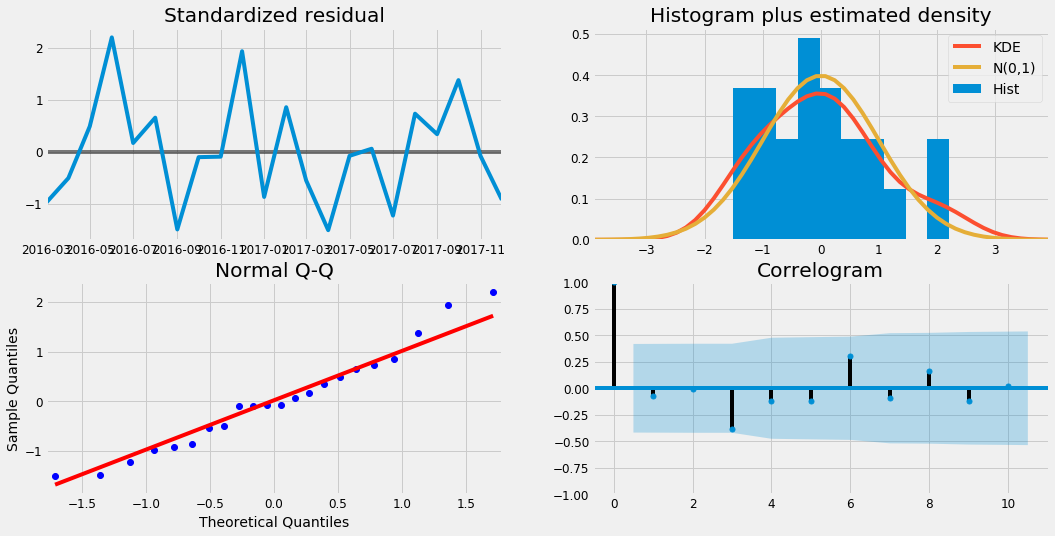

In [17]:
# Run model diagnostics 
    # check for unusual behaviour
    
results.plot_diagnostics(figsize=(16, 8))

plt.show()

In [18]:
# Diagnostics suggest model redisuals are almost normally distributed

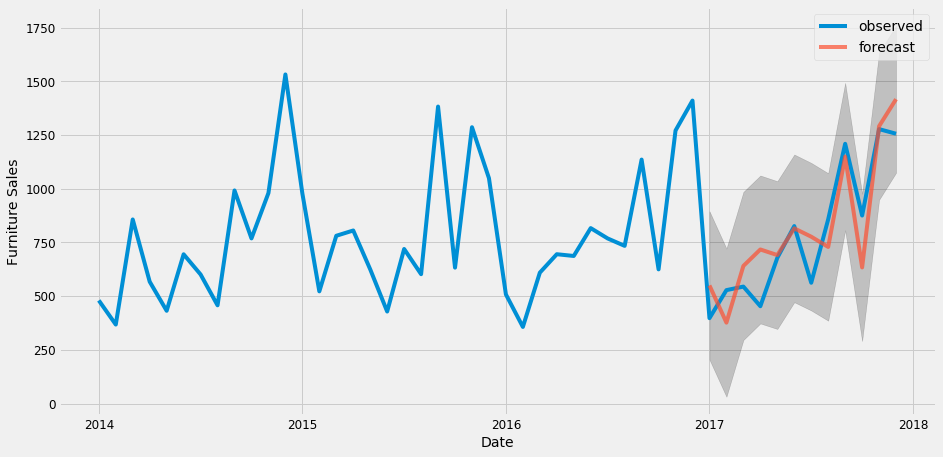

In [19]:
# Validate forecasts 
    # understand accuracy of forecast
        # compare predicted sales to real sales of time series
        
# Start prediction at 2017-01-01 to end 
    # Preserve pre-2017 

pred = results.get_prediction(start = pd.to_datetime('2017-01-01'),
                             dynamic = False)

pred_ci = pred.conf_int()

ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, 
                        label = "forecast",
                        alpha = .7,
                        figsize = (14, 7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [20]:
# forecasts align with true values very well
    # showing seasonality and upward trend towards end of year 

In [21]:
# MSE 

y_forecast = pred.predicted_mean
y_actual = y['2017-01-01':]

mse = ((y_forecast - y_actual) ** 2).mean()

print('MSE of forecast is {}'.format(round(mse, 2)))

    # lower MSE = better fit 
    
    # MSE = measure of estimator quality 
        # measures avg squared difference between estimated and actual 
        
    # Always non negative

MSE of forecast is 22993.58


In [22]:
# RMSE 

print('RMSE of forecast is {}'.format(round(np.sqrt(mse), 2)))
    
    # Indicate how concentrated data is around line of best fit 
    
    # Standard deviation of residuals (prediction errors)
    
    # model is able to forecast avg daily sales in the test set within 151.64 of real sales
    
    # daily sales range = 400 to > 1200 

RMSE of forecast is 151.64


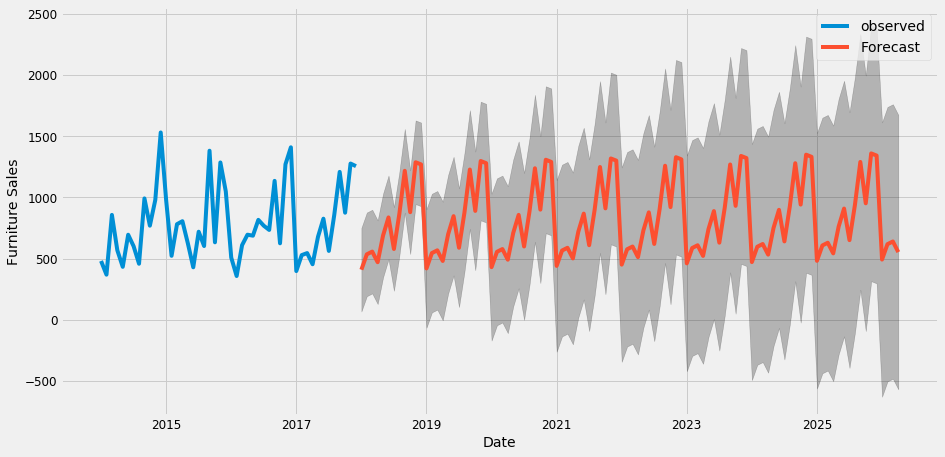

In [23]:
# Plotting forecasts 

pred_1 = results.get_forecast(steps = 100)
pred_ci = pred_1.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))

pred_1.predicted_mean.plot(ax = ax, label = 'Forecast')

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], 
                color = 'k', alpha = .25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()


In [24]:
# Shows seasonality 
# Confidence in values diminishes over time 
# Confidence intervals (grey) expands as forecasts moves further into the future

In [25]:
# Pre-proc 2 

furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']

In [26]:
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [27]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 
        'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 
        'Profit']

furniture.drop(cols, axis = 1, inplace = True)
office.drop(cols, axis = 1, inplace = True)

furniture = furniture.sort_values('Order Date')
offifce = office.sort_values('Order Date')

furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index()
office = office.groupby("Order Date")["Sales"].sum().reset_index()

In [28]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [29]:
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [30]:
# Combine dfs 
# Compare sales by day 
    # INNER JOIN on Order Date 

# Index with time series 

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

# Preferred freq = Month start
    # AVG sales / month
    
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

# DF preparation

furniture = pd.DataFrame({'Order Date': y_furniture.index,
                         'Sales': y_furniture.values})

office = pd.DataFrame({'Order Date': y_office.index, 
                       'Sales': y_office.values})

# Merge 

store = furniture.merge(office, how = 'inner', on = 'Order Date')

store.rename(columns = {'Sales_x': 'furniture_sales', 
                       'Sales_y': 'office_sales'}, inplace = True)

store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


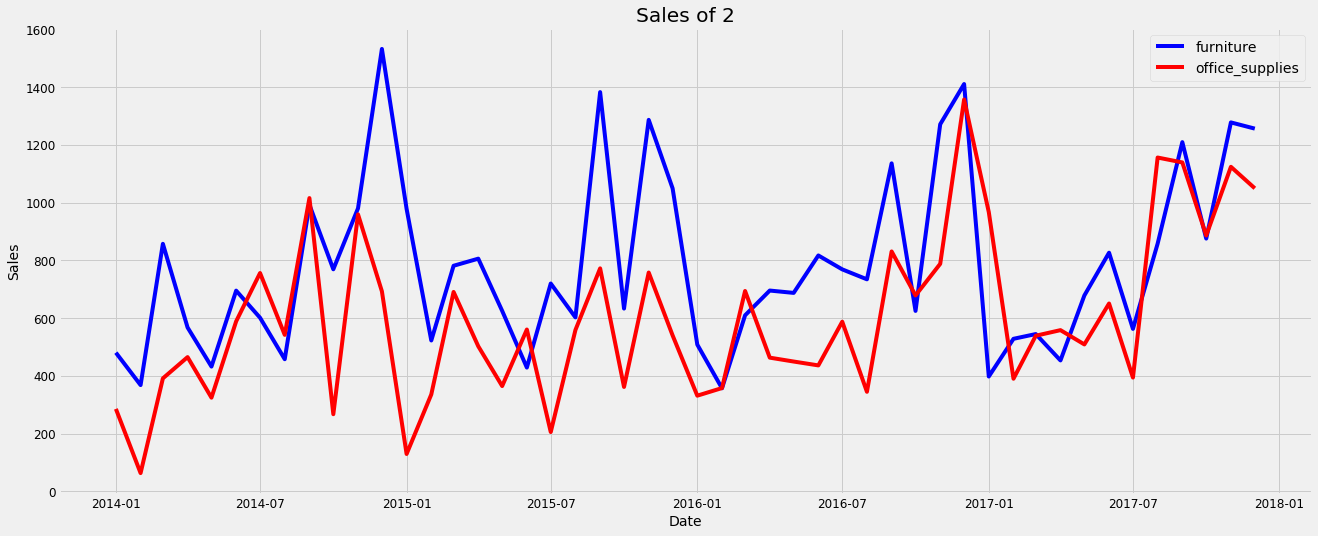

In [31]:
# Plot time series on 1 plot 

plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office_supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of 2')
plt.legend();

In [32]:
# Similar seasonsal pattern

# AVG daily sales Furn > office for most months

In [33]:
# First time office passed furn

first_time = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])),
                     'Order Date']

print("1st time office produced higher sales than furniture is {}".format(first_time.date()))

1st time office produced higher sales than furniture is 2014-07-01


In [34]:
# Timeseries model using Prophet 
    # analyze time-series with patterns of different time scales
        # e.g. yearly, weekly, daily 

from fbprophet import Prophet


# Fit models 

furniture = furniture.rename(columns = {'Order Date': 'ds', 
                                       'Sales': 'y'})
furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)

office = office.rename(columns = {'Order Date': 'ds', 
                                 'Sales': 'y'})
office_model = Prophet(interval_width = 0.95)
office_model.fit(office)

In [35]:
# Set model freq 
    # periods = integer number of periods to forecast forward 
    # 12 = forecast 1 year ahead, given freq = month

furniture_forecast = furniture_model.make_future_dataframe(periods = 12,
                                                          freq = 'MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods = 12,
                                                    freq = 'MS')
office_forecast = office_model.predict(office_forecast)


<Figure size 1296x432 with 0 Axes>

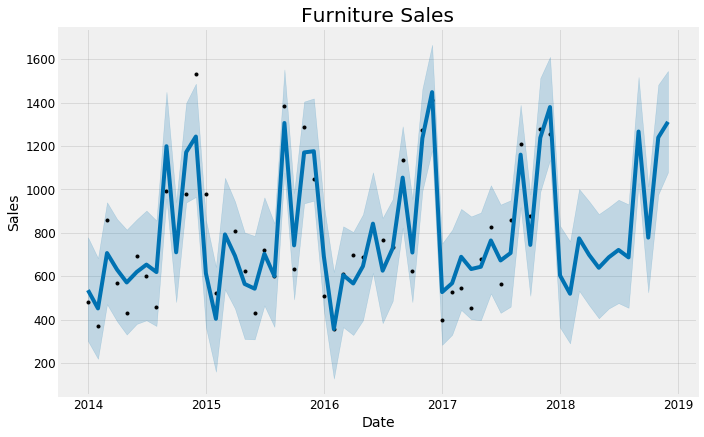

In [36]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast,
                    xlabel = 'Date', ylabel = 'Sales')

plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

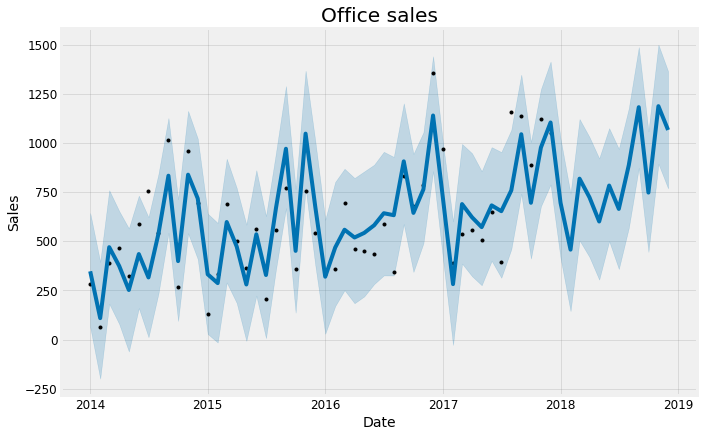

In [37]:
plt.figure(figsize = (18, 6))
office_model.plot(office_forecast,
                 xlabel = 'Date', ylabel = 'Sales')

plt.title('Office sales');

In [38]:
# Compare forecasts 

# modulus operator, gives remainder of values after dividing 
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in furniture_forecast.columns]

# Prepare dataframes for merge 
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names 

# Order date = ds
# rough merge 
forecast = pd.merge(merge_furniture_forecast, 
                   merge_office_forecast,
                   how = 'inner',
                   left_on = 'furniture_ds',
                   right_on = 'office_ds')

# correct dates 
forecast = forecast.rename(columns = {'furniture_ds': 'Date'}).drop('office_ds',axis = 1)

forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,300.894106,778.994590,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,218.898450,683.109732,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,470.291186,940.296300,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,391.909051,863.371778,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,330.673417,814.246852,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


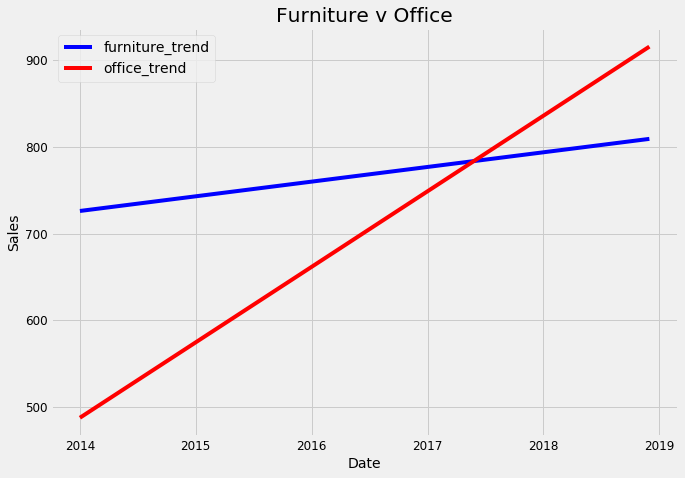

In [39]:
# Visualize trend & forecast

plt.figure(figsize = (10, 7))
plt.plot(forecast['Date'], 
        forecast['furniture_trend'],
        'b-')
plt.plot(forecast['Date'],
        forecast['office_trend'],
        'r-')

plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture v Office');

# Sales growth trend

Text(0.5, 1.0, 'Sale estimate')

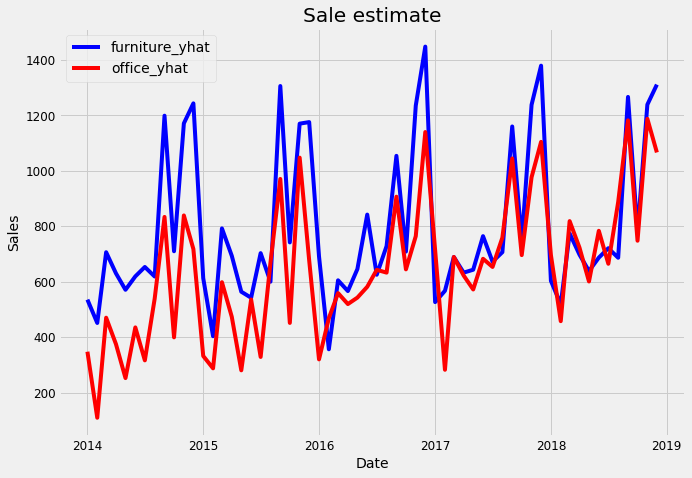

In [40]:
plt.figure(figsize=(10, 7))

plt.plot(forecast['Date'], 
         forecast['furniture_yhat'], 
         'b-')

plt.plot(forecast['Date'],
        forecast['office_yhat'], 'r-')

plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')

plt.title('Sale estimate')

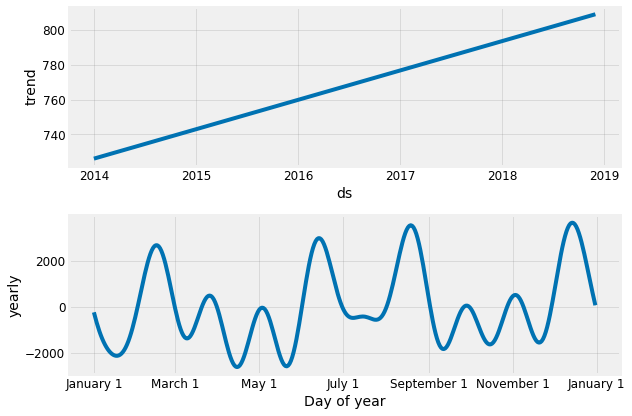

In [41]:
# Use Prophet models to inspect different trends

furniture_model.plot_components(furniture_forecast);

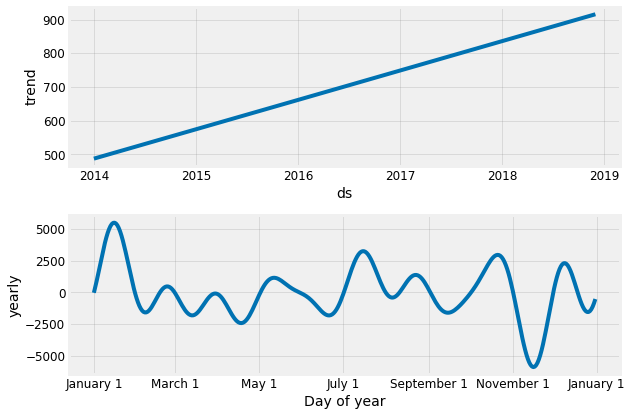

In [42]:
office_model.plot_components(office_forecast);

In [43]:
# linear increase over time, 

# office growth > furniture 